In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D

from keras.models import Model
from keras.models import Sequential
from keras.preprocessing import sequence
from keras.layers import Dense,GRU, Conv1D, Flatten,LSTM, MaxPooling1D,Dropout,Input,Activation,BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from numpy import unique
from keras.layers import Dense, Conv2D, MaxPool1D, Flatten, Dropout # importing dense layer
from sklearn import preprocessing
from keras.layers.embeddings import Embedding
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer


In [2]:
dataset = pd.read_csv('../input/rainfall-prediction/dataset1.csv')

In [3]:
dataset

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9


In [4]:
 dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [5]:
dataset.isnull().sum()

day                       0
pressure                  0
maxtemp                   0
temparature               0
mintemp                   0
dewpoint                  0
humidity                  0
cloud                     0
rainfall                  0
sunshine                  0
         winddirection    1
windspeed                 1
dtype: int64

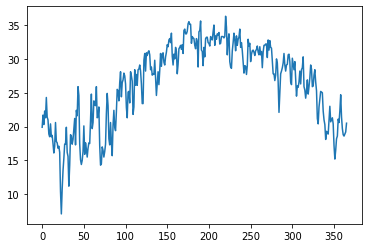

In [6]:
plt.plot(dataset['maxtemp'])


In [7]:
# remove attribute 'day'
dataset.drop(['day'],axis=1,inplace=True)
dataset.shape

(366, 11)

In [8]:
dataset = pd.get_dummies(dataset,columns=['rainfall'],prefix="",prefix_sep="")  
dataset


,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,no,yes
0,1025.9,19.9,18.3,16.8,13.1,72,49,9.3,80.0,26.3,0,1
1,1022.0,21.7,18.9,17.2,15.6,81,83,0.6,50.0,15.3,0,1
2,1019.7,20.3,19.3,18.0,18.4,95,91,0.0,40.0,14.2,0,1
3,1018.9,22.3,20.6,19.1,18.8,90,88,1.0,50.0,16.9,0,1
4,1015.9,21.3,20.7,20.2,19.9,95,81,0.0,40.0,13.7,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
361,1022.7,18.8,17.7,16.9,15.0,84,90,0.0,30.0,18.4,0,1
362,1026.6,18.6,17.3,16.3,12.8,75,85,1.0,20.0,25.9,0,1
363,1025.9,18.9,17.7,16.4,13.3,75,78,4.6,70.0,33.4,0,1
364,1025.3,19.2,17.3,15.2,13.3,78,86,1.2,20.0,20.9,0,1


In [9]:
##dataset.label.value_counts()
returns = dataset["maxtemp"].pct_change() # Used for univariate example.

column_names = dataset.columns
x = dataset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.759003,0.438356,0.487273,0.509294,0.498155,0.580645,0.49,0.768595,0.205882,0.397459,0.0,1.0
1,0.650970,0.500000,0.509091,0.524164,0.590406,0.725806,0.83,0.049587,0.117647,0.197822,0.0,1.0
2,0.587258,0.452055,0.523636,0.553903,0.693727,0.951613,0.91,0.000000,0.088235,0.177858,0.0,1.0
3,0.565097,0.520548,0.570909,0.594796,0.708487,0.870968,0.88,0.082645,0.117647,0.226860,0.0,1.0
4,0.481994,0.486301,0.574545,0.635688,0.749077,0.951613,0.81,0.000000,0.088235,0.168784,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
361,0.670360,0.400685,0.465455,0.513011,0.568266,0.774194,0.90,0.000000,0.058824,0.254083,0.0,1.0
362,0.778393,0.393836,0.450909,0.490706,0.487085,0.629032,0.85,0.082645,0.029412,0.390200,0.0,1.0
363,0.759003,0.404110,0.465455,0.494424,0.505535,0.629032,0.78,0.380165,0.176471,0.526316,0.0,1.0
364,0.742382,0.414384,0.450909,0.449814,0.505535,0.677419,0.86,0.099174,0.029412,0.299456,0.0,1.0


In [10]:
#plt.plot(df["1"])


In [11]:
returns


0           NaN
1      0.090452
2     -0.064516
3      0.098522
4     -0.044843
         ...   
361   -0.045685
362   -0.010638
363    0.016129
364    0.015873
365    0.067708
Name: maxtemp, Length: 366, dtype: float64

In [12]:
npa = returns.values[1:].reshape(-1,1) # Python is smart to recognize whatever dimension you need by using this parameter
print(len(npa))
# # Let's scale the data -- this helps avoid the exploding gradient issue
scale = MinMaxScaler(feature_range=(0,1)) # This is by default.
npa = scale.fit_transform(npa)
print(len(npa))

365
365


In [13]:
samples = 10 # Number of samples (in past)
steps = 1 # Number of steps (in future)
X = [] # X array
Y = [] # Y array
for i in range(npa.shape[0] - samples):
    X.append(npa[i:i+samples]) # Independent Samples
    Y.append(npa[i+samples][0]) # Dependent Samples
print('Training Data: Length is ',len(X[0:1][0]),': ', X[0:1])
print('Testing Data: Length is ', len(Y[0:1]),': ', Y[0:1])

Training Data: Length is  10 :  [array([[0.51012479],
       [0.33385438],
       [0.51930399],
       [0.35623173],
       [0.56744462],
       [0.27149262],
       [0.38597798],
       [0.29349288],
       [0.38316569],
       [0.52405919]])]
Testing Data: Length is  1 :  [0.30129898082650775]


In [14]:
X = np.array(X)
Y = np.array(Y)
print('Dimensions of X', X.shape, 'Dimensions of Y', Y.shape)

threshold = round(0.9 * X.shape[0])
print('Threshold is', threshold)

Dimensions of X (355, 10, 1) Dimensions of Y (355,)
Threshold is 320


In [15]:
y_train_multi= dataset[['yes','no']]
X_train_multi= dataset.drop(labels=['yes','no'], axis=1)

print('X_train has shape:',X_train_multi.shape,'\ny_train has shape:',y_train_multi.shape)

X_train has shape: (366, 10) 
y_train has shape: (366, 2)


In [16]:
from sklearn.preprocessing import LabelBinarizer

#y_train_multi = LabelBinarizer().fit_transform(y_train_multi)
#y_train_multi

In [17]:
X_train_multi=np.array(X_train_multi)
y_train_multi=np.array(y_train_multi)

In [18]:
#y_train_multi

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_train_multi,y_train_multi, test_size=0.20, random_state=42)

In [20]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(292, 10, 1)

In [21]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(74, 10, 1)

In [22]:
max=200

In [23]:
X_train=sequence.pad_sequences(X_train ,maxlen=max)

In [24]:
top=5000


In [25]:
 dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pressure                366 non-null    float64
 1   maxtemp                 366 non-null    float64
 2   temparature             366 non-null    float64
 3   mintemp                 366 non-null    float64
 4   dewpoint                366 non-null    float64
 5   humidity                366 non-null    int64  
 6   cloud                   366 non-null    int64  
 7   sunshine                366 non-null    float64
 8            winddirection  365 non-null    float64
 9   windspeed               365 non-null    float64
 10  no                      366 non-null    uint8  
 11  yes                     366 non-null    uint8  
dtypes: float64(8), int64(2), uint8(2)
memory usage: 29.4 KB


In [26]:
#from sklearn.preprocessing import LabelBinarizer

#y_train= LabelBinarizer().fit_transform(y_train)
 
#x_train=np.asarray(x_train).astype(np.float32)


In [27]:
model = Sequential()
model.add(Conv1D(32, 3, padding="same",input_shape = (X_train.shape[1], 1), activation='relu'))
#nn.add(MaxPooling1D(pool_size=(2)))
#cnn.add(Flatten())
#model = Sequential()
#model.add(TimeDistributed(cnn, ...))
model.add(LSTM(128,input_shape = (X_train.shape[1], 2)))
model.add(Dropout(0.2))
# Third LSTM layer

model.add(layers.Dense(2))


2022-10-25 01:11:12.904152: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-25 01:11:12.905099: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-25 01:11:13.257193: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-25 01:11:13.258071: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-25 01:11:13.258879: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [28]:
# defining loss function, optimizer, metrics and then compiling model
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

In [29]:
# summary of model layers
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 200, 32)           128       
_________________________________________________________________
lstm (LSTM)                  (None, 128)               82432     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 2)                 258       
Total params: 82,818
Trainable params: 82,818
Non-trainable params: 0
_________________________________________________________________


In [30]:
# training the model on training dataset
history = model.fit(X_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)


Epoch 1/100


2022-10-25 01:11:19.893583: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-10-25 01:11:23.295775: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1/1 [==============================] - 17s 17s/step - loss: 7.0220 - accuracy: 0.4979 - val_loss: 2.9103 - val_accuracy: 0.7288
Epoch 2/100
1/1 [==============================] - 0s 61ms/step - loss: 3.6645 - accuracy: 0.5880 - val_loss: 1.4624 - val_accuracy: 0.7966
Epoch 3/100
1/1 [==============================] - 0s 72ms/step - loss: 2.6419 - accuracy: 0.6481 - val_loss: 1.8255 - val_accuracy: 0.7797
Epoch 4/100
1/1 [==============================] - 0s 48ms/step - loss: 2.9136 - accuracy: 0.6609 - val_loss: 1.8858 - val_accuracy: 0.7627
Epoch 5/100
1/1 [==============================] - 0s 50ms/step - loss: 2.9551 - accuracy: 0.6609 - val_loss: 1.9951 - val_accuracy: 0.7627
Epoch 6/100
1/1 [==============================] - 0s 47ms/step - loss: 3.3536 - accuracy: 0.6567 - val_loss: 2.0759 - val_accuracy: 0.7627
Epoch 7/100
1/1 [==============================] - 0s 45ms/step - loss: 3.2537 - accuracy: 0.6652 - val_loss: 2.0006 - val_accuracy: 0.7627
Epoch 8/100
1/1 [===============

In [31]:
# predicting target attribute on testing dataset
model.evaluate(X_test, y_test, verbose=1)
  

3/3 [==============================] - 0s 13ms/step - loss: 0.5146 - accuracy: 0.7703


[0.5146227478981018, 0.7702702879905701]

Text(0, 0.5, 'Loss')

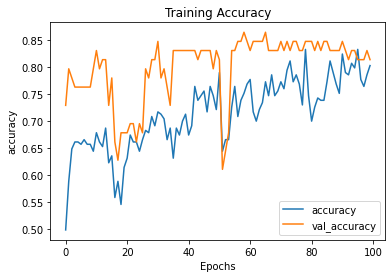

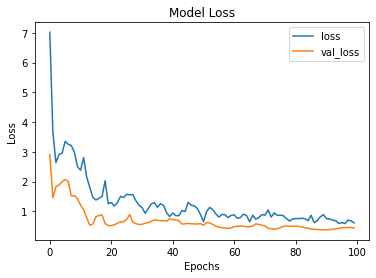

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)

pd.DataFrame(history.history)[["accuracy", "val_accuracy"]].plot()
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")

pd.DataFrame(history.history)[["loss", "val_loss"]].plot()
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")